## Genetic Sequencing With Machine Learning

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
human = pd.read_table('human.txt')

In [7]:
human.head()

,sequence,class
0,ATGCCCCAACTAAATACTACCGTATGGCCCACCATAATTACCCCCA...,4
1,ATGAACGAAAATCTGTTCGCTTCATTCATTGCCCCCACAATCCTAG...,4
2,ATGTGTGGCATTTGGGCGCTGTTTGGCAGTGATGATTGCCTTTCTG...,3
3,ATGTGTGGCATTTGGGCGCTGTTTGGCAGTGATGATTGCCTTTCTG...,3
4,ATGCAACAGCATTTTGAATTTGAATACCAGACCAAAGTGGATGGTG...,3


## We have some data for human DNA sequence coding regions and a class label. We also have data for Chimpanzee and a more divergent species, the dog.


In [9]:
chimp = pd.read_table('chimpanzee.txt')
dog = pd.read_table('dog.txt')
chimp.head()


,sequence,class
0,ATGCCCCAACTAAATACCGCCGTATGACCCACCATAATTACCCCCA...,4
1,ATGAACGAAAATCTATTCGCTTCATTCGCTGCCCCCACAATCCTAG...,4
2,ATGGCCTCGCGCTGGTGGCGGTGGCGACGCGGCTGCTCCTGGAGGC...,4
3,ATGGCCTCGCGCTGGTGGCGGTGGCGACGCGGCTGCTCCTGGAGGC...,4
4,ATGGGCAGCGCCAGCCCGGGTCTGAGCAGCGTGTCCCCCAGCCACC...,6


In [10]:
dog.head()

,sequence,class
0,ATGCCACAGCTAGATACATCCACCTGATTTATTATAATCTTTTCAA...,4
1,ATGAACGAAAATCTATTCGCTTCTTTCGCTGCCCCCTCAATAATAG...,4
2,ATGGAAACACCCTTCTACGGCGATGAGGCGCTGAGCGGCCTGGGCG...,6
3,ATGTGCACTAAAATGGAACAGCCCTTCTACCACGACGACTCATACG...,6
4,ATGAGCCGGCAGCTAAACAGAAGCCAGAACTGCTCCTTCAGTGACG...,0


In [11]:
human.shape

(4380, 2)

In [12]:
chimp.shape

(1682, 2)

In [13]:
dog.shape

(820, 2)

In [14]:
human.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4380 entries, 0 to 4379
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   sequence  4380 non-null   object
 1   class     4380 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 68.6+ KB


In [15]:
chimp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1682 entries, 0 to 1681
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   sequence  1682 non-null   object
 1   class     1682 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 26.4+ KB


In [16]:
dog.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 820 entries, 0 to 819
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   sequence  820 non-null    object
 1   class     820 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 12.9+ KB


In [17]:
human["sequence"][0]

'ATGCCCCAACTAAATACTACCGTATGGCCCACCATAATTACCCCCATACTCCTTACACTATTCCTCATCACCCAACTAAAAATATTAAACACAAACTACCACCTACCTCCCTCACCAAAGCCCATAAAAATAAAAAATTATAACAAACCCTGAGAACCAAAATGAACGAAAATCTGTTCGCTTCATTCATTGCCCCCACAATCCTAG'

In [18]:
chimp["sequence"][1]

'ATGAACGAAAATCTATTCGCTTCATTCGCTGCCCCCACAATCCTAGGCTTACCCGCCGCAGTACTAATCATTCTATTCCCCCCTCTACTGGTCCCCACTTCTAAACATCTCATCAACAACCGACTAATTACCACCCAACAATGACTAATTCAACTGACCTCAAAACAAATAATAACTATACACAGCACTAAAGGACGAACCTGATCTCTCATACTAGTATCCTTAATCATTTTTATTACCACAACCAATCTTCTTGGGCTTCTACCCCACTCATTCACACCAACCACCCAACTATCTATAAACCTAGCCATGGCTATCCCCCTATGAGCAGGCGCAGTAGTCATAGGCTTTCGCTTTAAGACTAAAAATGCCCTAGCCCACTTCTTACCGCAAGGCACACCTACACCCCTTATCCCCATACTAGTTATCATCGAAACTATTAGCCTACTCATTCAACCAATAGCCTTAGCCGTACGTCTAACCGCTAACATTACTGCAGGCCACCTACTCATGCACCTAATTGGAAGCGCCACACTAGCATTATCAACTATCAATCTACCCTATGCACTCATTATCTTCACAATTCTAATCCTACTGACTATTCTAGAGATCGCCGTCGCCTTAATCCAAGCCTACGTTTTTACACTTCTAGTGAGCCTCTACCTGCACGACAACACATAA'

In [19]:
dog["sequence"][4]

'ATGAGCCGGCAGCTAAACAGAAGCCAGAACTGCTCCTTCAGTGACGTCGATGAGCTGATGAAGACGGTGCAGTTGGCTGTCCACATCCCCACCTTCCTCCTGGGCCTCCTCCTCAACCTGCTGGCCATCCGAGGCTTCAGCACCTTCCTGAGGAAGAGGAGGTGGCCGGATTATGCCGCCACCGCCATCTACATGATCAACCTGGCCATCTTTGACCTGCTCCTGGTGCTGTCCCTTCCGTTCAAGATGGCTCTGGCCAACGTGCGGGCCCCCCTTCCTTCCCTCTGTACCTTGGTGGAGTGCTTCTACTTCATCAGCATGTACGGGAGTGTCTTCACCATCTGCTTCATCAGTCTGGATAGATTCTTGGCCATCCGGTTCCCGTTCCTGGTCAGCCACCTCCGGTCGCCCAGGAAGATCTTCGGGATCTGTTGCACCATCTGGGTCCTGGTGTGGGCCGGGAGCATCCCTATCTACAGCTTCCATGGGAAGATGGAAAAATACACATGCTTCCACAACATGTCCGATGGCACCTGGAGCGCCCAGGTCTTCTTTCCCCTTGAGGTGTTTGGCTTCCTCCTTCCCATGGCTGTCATGGGTTTCTGTTCCTCCAGGAGCATTCACATTCTGGTAGGTCGCCGGGGCCTCACCCAGGACTGGGTCCAGCAGAAGGCCTGCATCTGGACAATTGCAGCCAGTCTGGCTGTCTTTGTGGTCTCCTTTCTTCCGGTCCACCTGGGTTTCTTCTTGCAGTTCCTGGTACGGAATGGCTTCATCGTGGAGTGCAGAGCTAAGCAGAACATTAGCTTGTTTTTGCAATTGTCCATGTGTTTCTCCAACGTCAACTGCTGCCTAGATGTCTTCTGCTACTACTTTGTCATCAAAGAATTCCGCATGGACATCATGGCCCACCGGCCCTCCAGGGTCCAGCTGGTGCCCCAGGACACCATGACCAGCAGGGCCTAA'

## Treating DNA sequence as a "language", otherwise known as k-mer counting
A challenge that remains is that none of these above methods results in vectors of uniform length, and that is a requirement for feeding data to a classification or regression algorithm. So with the above methods you have to resort to things like truncating sequences or padding with "n" or "0" to get vectors of uniform length.

DNA and protein sequences can be viewed metaphorically as the language of life. The language encodes instructions as well as function for the molecules that are found in all life forms. The sequence language analogy continues with the genome as the book, subsequences (genes and gene families) are sentences and chapters, k-mers and peptides (motifs) are words, and nucleotide bases and amino acids are the alphabet. Since the analogy seems so apt, it stands to reason that the amazing work done in the natural language processing field should also apply to the natural language of DNA and protein sequences.

The method I use here is simple and easy. I first take the long biological sequence and break it down into k-mer length overlapping “words”. For exampl
    e, if I use "words" of length 6 (hexamers), “ATGCATGCA” becomes: ‘ATGCAT’, ‘TGCATG’, ‘GCATGC’, ‘CATGCA’. Hence our example sequence is broken down into 4 hexamer words.

Here I am using hexamer “words” but that is arbitrary and word length can be tuned to suit the particular situation. The word length and amount of overlap need to be determined empirically for any given application.
                                                                                                                                                                                            
In genomics, we refer to these types of manipulations as "k-mer counting", or counting the occurances of each possible k-mer sequence. There are specialized tools for this, but the Python natural language processing tools make it supe easy.     
                                                                                                                                                                  
Here is a function that can be used to convert any sequence (string) to overlapping k-mer words:                                                                                                                                                                 

## Let's define a function to collect all possible overlapping k-mers of a specified length from any sequence string. We will basically apply the k-mers to the complete sequences.

In [22]:
def getKmers(sequence, size = 6):
    return [sequence[x:x+size].lower() for x in range(len(sequence) - size + 1)]
    

In [23]:
human["words"] = human.apply(lambda x : getKmers(x["sequence"]),axis =1)
human.head()

,sequence,class,words
0,ATGCCCCAACTAAATACTACCGTATGGCCCACCATAATTACCCCCA...,4,"[atgccc, tgcccc, gcccca, ccccaa, cccaac, ccaac..."
1,ATGAACGAAAATCTGTTCGCTTCATTCATTGCCCCCACAATCCTAG...,4,"[atgaac, tgaacg, gaacga, aacgaa, acgaaa, cgaaa..."
2,ATGTGTGGCATTTGGGCGCTGTTTGGCAGTGATGATTGCCTTTCTG...,3,"[atgtgt, tgtgtg, gtgtgg, tgtggc, gtggca, tggca..."
3,ATGTGTGGCATTTGGGCGCTGTTTGGCAGTGATGATTGCCTTTCTG...,3,"[atgtgt, tgtgtg, gtgtgg, tgtggc, gtggca, tggca..."
4,ATGCAACAGCATTTTGAATTTGAATACCAGACCAAAGTGGATGGTG...,3,"[atgcaa, tgcaac, gcaaca, caacag, aacagc, acagc..."


In [24]:
chimp["words"]  = chimp.apply(lambda x: getKmers(x["sequence"]),axis = 1)
chimp.head()

,sequence,class,words
0,ATGCCCCAACTAAATACCGCCGTATGACCCACCATAATTACCCCCA...,4,"[atgccc, tgcccc, gcccca, ccccaa, cccaac, ccaac..."
1,ATGAACGAAAATCTATTCGCTTCATTCGCTGCCCCCACAATCCTAG...,4,"[atgaac, tgaacg, gaacga, aacgaa, acgaaa, cgaaa..."
2,ATGGCCTCGCGCTGGTGGCGGTGGCGACGCGGCTGCTCCTGGAGGC...,4,"[atggcc, tggcct, ggcctc, gcctcg, cctcgc, ctcgc..."
3,ATGGCCTCGCGCTGGTGGCGGTGGCGACGCGGCTGCTCCTGGAGGC...,4,"[atggcc, tggcct, ggcctc, gcctcg, cctcgc, ctcgc..."
4,ATGGGCAGCGCCAGCCCGGGTCTGAGCAGCGTGTCCCCCAGCCACC...,6,"[atgggc, tgggca, gggcag, ggcagc, gcagcg, cagcg..."


In [25]:
dog["words"]=dog.apply(lambda x: getKmers(x["sequence"]),axis=1)
dog.head()

,sequence,class,words
0,ATGCCACAGCTAGATACATCCACCTGATTTATTATAATCTTTTCAA...,4,"[atgcca, tgccac, gccaca, ccacag, cacagc, acagc..."
1,ATGAACGAAAATCTATTCGCTTCTTTCGCTGCCCCCTCAATAATAG...,4,"[atgaac, tgaacg, gaacga, aacgaa, acgaaa, cgaaa..."
2,ATGGAAACACCCTTCTACGGCGATGAGGCGCTGAGCGGCCTGGGCG...,6,"[atggaa, tggaaa, ggaaac, gaaaca, aaacac, aacac..."
3,ATGTGCACTAAAATGGAACAGCCCTTCTACCACGACGACTCATACG...,6,"[atgtgc, tgtgca, gtgcac, tgcact, gcacta, cacta..."
4,ATGAGCCGGCAGCTAAACAGAAGCCAGAACTGCTCCTTCAGTGACG...,0,"[atgagc, tgagcc, gagccg, agccgg, gccggc, ccggc..."


In [26]:
human=human.drop("sequence",axis=1)
human.head()

,class,words
0,4,"[atgccc, tgcccc, gcccca, ccccaa, cccaac, ccaac..."
1,4,"[atgaac, tgaacg, gaacga, aacgaa, acgaaa, cgaaa..."
2,3,"[atgtgt, tgtgtg, gtgtgg, tgtggc, gtggca, tggca..."
3,3,"[atgtgt, tgtgtg, gtgtgg, tgtggc, gtggca, tggca..."
4,3,"[atgcaa, tgcaac, gcaaca, caacag, aacagc, acagc..."


In [27]:
chimp=chimp.drop("sequence",axis=1)
chimp.head()

,class,words
0,4,"[atgccc, tgcccc, gcccca, ccccaa, cccaac, ccaac..."
1,4,"[atgaac, tgaacg, gaacga, aacgaa, acgaaa, cgaaa..."
2,4,"[atggcc, tggcct, ggcctc, gcctcg, cctcgc, ctcgc..."
3,4,"[atggcc, tggcct, ggcctc, gcctcg, cctcgc, ctcgc..."
4,6,"[atgggc, tgggca, gggcag, ggcagc, gcagcg, cagcg..."


In [28]:
dog=dog.drop("sequence",axis=1)
dog.head()

,class,words
0,4,"[atgcca, tgccac, gccaca, ccacag, cacagc, acagc..."
1,4,"[atgaac, tgaacg, gaacga, aacgaa, acgaaa, cgaaa..."
2,6,"[atggaa, tggaaa, ggaaac, gaaaca, aaacac, aacac..."
3,6,"[atgtgc, tgtgca, gtgcac, tgcact, gcacta, cacta..."
4,0,"[atgagc, tgagcc, gagccg, agccgg, gccggc, ccggc..."


## Since we are going to use scikit-learn natural language processing tools to do the k-mer counting, we need to now convert the lists of k-mers for each gene into string sentences of words that the count vectorizer can use. We can also make a y variable to hold the class labels. Let's do that now.

In [30]:
human_texts=list(human["words"])
for item in range(len(human_texts)):
    human_texts[item] = ' '.join(human_texts[item])
y_h = human.iloc[:, 0].values 
human_texts[0]

'atgccc tgcccc gcccca ccccaa cccaac ccaact caacta aactaa actaaa ctaaat taaata aaatac aatact atacta tactac actacc ctaccg taccgt accgta ccgtat cgtatg gtatgg tatggc atggcc tggccc ggccca gcccac cccacc ccacca caccat accata ccataa cataat ataatt taatta aattac attacc ttaccc tacccc accccc ccccca ccccat cccata ccatac catact atactc tactcc actcct ctcctt tcctta ccttac cttaca ttacac tacact acacta cactat actatt ctattc tattcc attcct ttcctc tcctca cctcat ctcatc tcatca catcac atcacc tcaccc caccca acccaa cccaac ccaact caacta aactaa actaaa ctaaaa taaaaa aaaaat aaaata aaatat aatatt atatta tattaa attaaa ttaaac taaaca aaacac aacaca acacaa cacaaa acaaac caaact aaacta aactac actacc ctacca taccac accacc ccacct caccta acctac cctacc ctacct tacctc acctcc cctccc ctccct tccctc ccctca cctcac ctcacc tcacca caccaa accaaa ccaaag caaagc aaagcc aagccc agccca gcccat cccata ccataa cataaa ataaaa taaaaa aaaaat aaaata aaataa aataaa ataaaa taaaaa aaaaaa aaaaat aaaatt aaatta aattat attata ttataa tataac ataaca taacaa aacaaa acaaa

In [31]:
y_h

array([4, 4, 3, ..., 6, 6, 6], dtype=int64)

## We will perform the same steps for chimpanzee and dog

In [33]:
chimp_texts = list(chimp['words'])
for item in range(len(chimp_texts)):
    chimp_texts[item] = ' '.join(chimp_texts[item])
y_c = chimp.iloc[:, 0].values 

In [34]:
chimp_texts[2]

'atggcc tggcct ggcctc gcctcg cctcgc ctcgcg tcgcgc cgcgct gcgctg cgctgg gctggt ctggtg tggtgg ggtggc gtggcg tggcgg ggcggt gcggtg cggtgg ggtggc gtggcg tggcga ggcgac gcgacg cgacgc gacgcg acgcgg cgcggc gcggct cggctg ggctgc gctgct ctgctc tgctcc gctcct ctcctg tcctgg cctgga ctggag tggagg ggaggc gaggcc aggccg ggccgg gccggc ccggcg cggcgg ggcggc gcggcg cggcgc ggcgcg gcgcgg cgcgga gcggag cggagc ggagct gagctc agctcc gctccg ctccgg tccggg ccgggc cgggcc gggccc ggcccg gcccgg cccggc ccggct cggctc ggctcc gctccc ctcccc tcccca ccccag cccagg ccaggc caggcc aggccg ggccgt gccgtg ccgtgc cgtgcg gtgcgg tgcggg gcggga cgggac gggacc ggaccg gaccgt accgtc ccgtcg cgtcgg gtcggg tcgggg cggggc ggggcc gggccg ggccga gccgag ccgagc cgagcg gagcgc agcgcc gcgccg cgccgc gccgct ccgctg cgctgc gctgcc ctgccg tgccga gccgac ccgacg cgacgt gacgtc acgtcc cgtccg gtccgc tccgcg ccgcgc cgcgcg gcgcgc cgcgca gcgcag cgcagg gcaggt caggtt aggttc ggttca gttcat ttcata tcatag catagg ataggc taggcg aggcgg ggcgga gcggaa cggaag ggaagg gaaggg aaggga aggga

In [35]:
dog_texts = list(dog['words'])
for item in range(len(dog_texts)):
    dog_texts[item] = ' '.join(dog_texts[item])
y_d = dog.iloc[:, 0].values
dog_texts[1]

'atgaac tgaacg gaacga aacgaa acgaaa cgaaaa gaaaat aaaatc aaatct aatcta atctat tctatt ctattc tattcg attcgc ttcgct tcgctt cgcttc gcttct cttctt ttcttt tctttc ctttcg tttcgc ttcgct tcgctg cgctgc gctgcc ctgccc tgcccc gccccc ccccct cccctc ccctca cctcaa ctcaat tcaata caataa aataat ataata taatag aatagg ataggt taggtc aggtct ggtctc gtctcc tctccc ctccct tcccta ccctat cctatt ctattg tattgt attgtg ttgtgg tgtggt gtggta tggtac ggtact gtactg tactga actgat ctgatc tgatcg gatcgt atcgtc tcgtca cgtcat gtcata tcatat catatt atattc tattcc attccc ttccct tccctt cccttc ccttcc cttcca ttccat tccatt ccattt catttt atttta ttttat tttatt ttattc tattcc attccc ttccca tcccaa cccaac ccaaca caacac aacacc acaccc caccca acccag cccagt ccagtc cagtcg agtcgc gtcgcc tcgcct cgccta gcctaa cctaat ctaatc taatca aatcaa atcaat tcaata caataa aataat ataatc taatcg aatcgg atcggt tcggtt cggtta ggttaa gttaat ttaatc taatct aatctc atctcc tctcca ctccat tccatt ccattc cattca attcag ttcagc tcagca cagcaa agcaat gcaatg caatga aatgac atgact tgacta gacta

## Now we will apply the BAG of WORDS using CountVectorizer using NLP

In [37]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(ngram_range=(4,4))
X = cv.fit_transform(human_texts)
X_chimp = cv.transform(chimp_texts)
X_dog = cv.transform(dog_texts)

In [38]:
print(X.shape)
print(X_chimp.shape)
print(X_dog.shape)


(4380, 232414)
(1682, 232414)
(820, 232414)


## If we have a look at class balance we can see we have relatively balanced dataset.

<Axes: xlabel='class'>

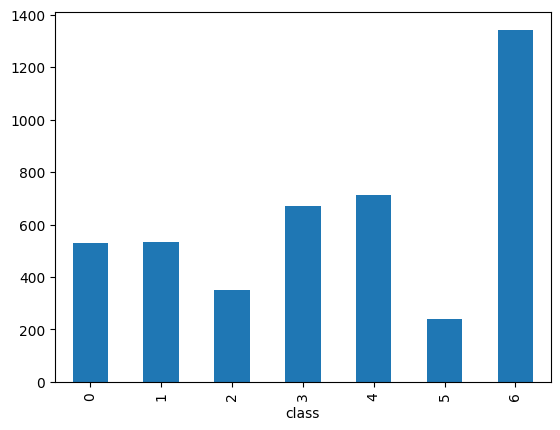

In [40]:
human["class"].value_counts().sort_index().plot.bar()

<Axes: xlabel='class'>

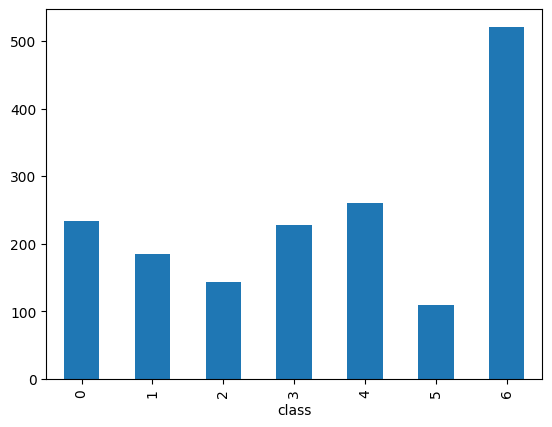

In [41]:
chimp['class'].value_counts().sort_index().plot.bar()

<Axes: xlabel='class'>

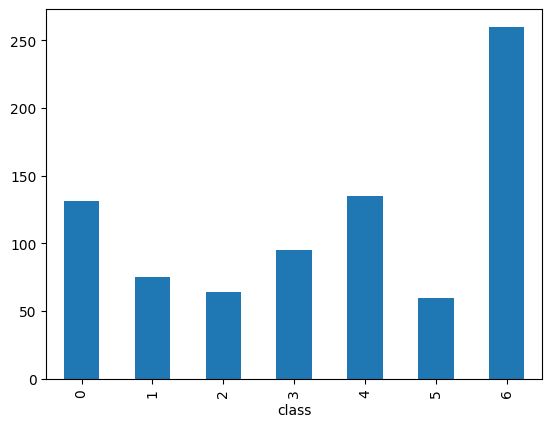

In [42]:
dog['class'].value_counts().sort_index().plot.bar()

In [43]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y_h,test_size=0.2,random_state=42)

In [44]:
print(x_train.shape)
print(x_test.shape)

(3504, 232414)
(876, 232414)


## A multinomial naive Bayes classifier will be created. I previously did some parameter tuning and found the ngram size of 4 (reflected in the Countvectorizer() instance) and a model alpha of 0.1 did the best.

In [108]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB(alpha=0.05)
classifier.fit(x_train, y_train)

MultinomialNB(alpha=0.05)

In [110]:
y_pred = classifier.predict(x_test)

In [112]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
print("Confusion matrix\n")
print(pd.crosstab(pd.Series(y_test, name='Actual'), pd.Series(y_pred, name='Predicted')))
def get_metrics(y_test, y_predicted):
    accuracy = accuracy_score(y_test, y_predicted)
    precision = precision_score(y_test, y_predicted, average='weighted')
    recall = recall_score(y_test, y_predicted, average='weighted')
    f1 = f1_score(y_test, y_predicted, average='weighted')
    return accuracy, precision, recall, f1
accuracy, precision, recall, f1 = get_metrics(y_test, y_pred)
print("accuracy = %.3f \nprecision = %.3f \nrecall = %.3f \nf1 = %.3f" % (accuracy, precision, recall, f1))

Confusion matrix

Predicted   0    1   2    3    4   5    6
Actual                                   
0          99    0   0    0    1   0    2
1           0  102   0    0    0   0    4
2           0    0  78    0    0   0    0
3           0    0   0  124    0   0    1
4           0    0   0    0  143   0    6
5           0    0   0    0    0  51    0
6           1    0   0    1    0   0  263
accuracy = 0.982 
precision = 0.982 
recall = 0.982 
f1 = 0.982


In [49]:
y_pred_chimp = classifier.predict(X_chimp)


In [50]:
print("Confusion matrix\n")
print(pd.crosstab(pd.Series(y_test, name='Actual'), pd.Series(y_pred_chimp,name='Predicted')))
def get_metrics(y_test, y_predicted):
    accuracy = accuracy_score(y_test, y_predicted)
    precision = precision_score(y_test, y_predicted, average='weighted')
    recall = recall_score(y_test, y_predicted, average='weighted')
    f1 = f1_score(y_test, y_predicted, average='weighted')
    return accuracy, precision, recall, f1
accuracy, precision, recall, f1 = get_metrics(y_test, y_pred)
print("accuracy = %.3f \nprecision = %.3f \nrecall = %.3f \nf1 = %.3f" % (accuracy, precision, recall, f1))

Confusion matrix

Predicted   0   1   2   3   4   5   6
Actual                               
0          13  10  13  10  19   6  31
1          18   9   9  15  12   9  34
2          13   3   6  15  10   5  26
3          21  19   7  18  12  10  38
4          25  13   9  20  32   9  41
5          10   2   7   9   7   4  12
6          39  34  22  33  39  16  82
accuracy = 0.984 
precision = 0.984 
recall = 0.984 
f1 = 0.984


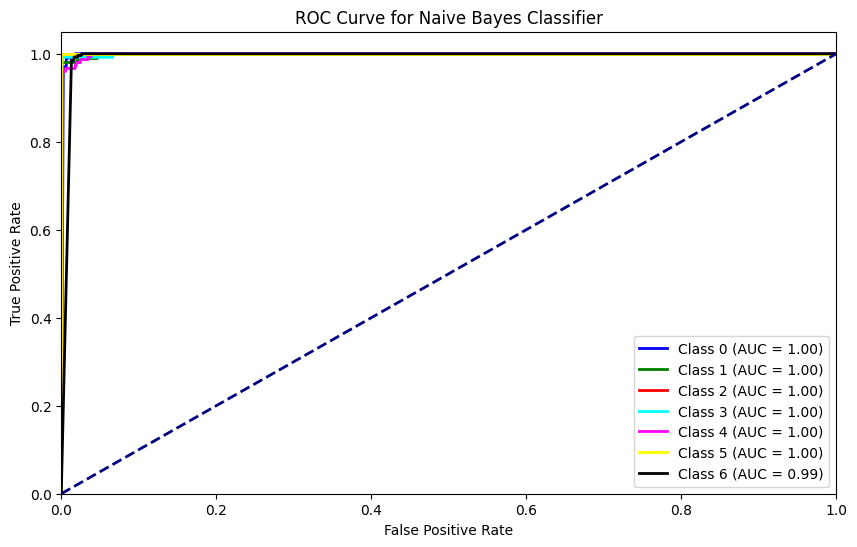

In [51]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Get predicted probabilities for each class
y_pred_proba = classifier.predict_proba(x_test)

# Compute ROC curve for each class
fpr = {}
tpr = {}
roc_auc = {}
n_classes = len(classifier.classes_)
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test, y_pred_proba[:, i], pos_label=i)
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure(figsize=(10, 6))
colors = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'black', 'purple', 'orange', 'pink']
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], color=colors[i], lw=2, label='Class %s (AUC = %0.2f)' % (i, roc_auc[i]))

plt.plot([0, 1], [0, 1], color='navy', linestyle='--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Naive Bayes Classifier')
plt.legend(loc="lower right")
plt.show()

## Random Forest (Model2)

In [53]:

from sklearn.ensemble import RandomForestClassifier #importing the RandomForestclassifier algorithm from sklearn
rf = RandomForestClassifier(n_estimators=400)
rf.fit(x_train,y_train)
y_pred = rf.predict(x_test)
print("Accuracy for human data using RandomForest Classifier : ",accuracy_score(y_pred,y_test))

Accuracy for human data using RandomForest Classifier :  0.9189497716894978


In [54]:
print("Confusion matrix\n")
print(pd.crosstab(pd.Series(y_test, name='Actual'), pd.Series(y_pred, name='Predicted')))
def get_metrics(y_test,y_predicted):
    accuracy=accuracy_score(y_test,y_predicted)
    precision=precision_score(y_test,y_predicted,average='weighted')
    recall=recall_score(y_test,y_predicted,average='weighted')
    f1=f1_score(y_test,y_predicted,average='weighted')
    return accuracy,precision,recall,f1
rf_accuracy, rf_precision, rf_recall, rf_f1 = get_metrics(y_test, y_pred)
print("rf_accuracy = %.3f \nrf_precision = %.3f \nrf_recall = %.3f \nrf_f1 = %.3f" % (rf_accuracy, rf_precision, rf_recall, rf_f1))
     

Confusion matrix

Predicted   0   1   2    3    4   5    6
Actual                                  
0          94   0   0    5    1   0    2
1           2  95   0    6    1   0    2
2           0   0  71    3    0   0    4
3           0   0   0  120    0   0    5
4           1   0   0   12  132   0    4
5           1   0   0    3    0  42    5
6           1   0   0   13    0   0  251
rf_accuracy = 0.919 
rf_precision = 0.930 
rf_recall = 0.919 
rf_f1 = 0.921


## XGBOOST (ML MODEL 3)

In [56]:
!pip install xgboost

In [57]:
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.8984018264840182


In [58]:
print("Confusion matrix\n")
print(pd.crosstab(pd.Series(y_test, name='Actual'), pd.Series(y_pred, name='Predicted')))
def get_metrics(y_test,y_predicted):
    accuracy=accuracy_score(y_test,y_predicted)
    precision=precision_score(y_test,y_predicted,average='weighted')
    recall=recall_score(y_test,y_predicted,average='weighted')
    f1=f1_score(y_test,y_predicted,average='weighted')
    return accuracy,precision,recall,f1
accuracy_xgb,precision_xgb,recall_xgb,f1_xgb=get_metrics(y_test,y_pred)
print("accuracy_xgb = %.3f \nprecision_xgb = %.3f \nrecall_xgb = %.3f \nf1_xgb = %.3f" % (accuracy_xgb, precision_xgb, recall_xgb, f1_xgb))
     

Confusion matrix

Predicted   0   1   2    3    4   5    6
Actual                                  
0          81   0   0    0    3   0   18
1           0  90   0    3    0   0   13
2           0   0  66    1    1   0   10
3           0   0   0  113    0   0   12
4           2   0   0    4  132   0   11
5           0   0   0    0    0  45    6
6           2   0   0    1    2   0  260
accuracy_xgb = 0.898 
precision_xgb = 0.912 
recall_xgb = 0.898 
f1_xgb = 0.900


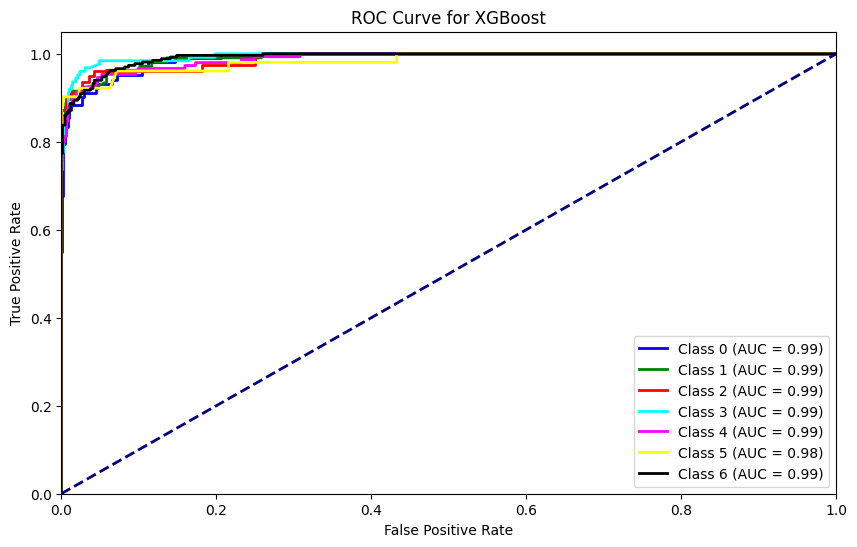

In [59]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Get predicted probabilities for each class
y_pred_proba = model.predict_proba(x_test)

fpr = {}
tpr = {}
roc_auc = {}
n_classes = len(model.classes_)
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test, y_pred_proba[:, i], pos_label=i)
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(10, 6))
colors = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'black', 'purple', 'orange', 'pink']
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], color=colors[i], lw=2, label='Class %s (AUC = %0.2f)' % (i, roc_auc[i]))

plt.plot([0, 1], [0, 1], color='navy', linestyle='--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for XGBoost')
plt.legend(loc="lower right")
plt.show()

##                            End Of the Project